In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import seaborn as sns
import datetime
import os
import shutil               
import networkx as nx
from networkx.algorithms import community
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
import bct
import Newmann_mod as nm

In [ ]:
%cd ..

In [ ]:
!pwd

In [6]:
## ALL FUNCTIONS

def rearrange_adj(ws,z):
    newWS = np.zeros(ws.shape)

    nO = list(z)
    for i in range(len(ws)):
        for j in range(len(ws[0])):
            newWS[nO.index(i)][nO.index(j)] = ws[i][j]
    return newWS


## P times Adjacency matrix
def weighted_adjmatrix(A,p,ach,fgaba):
    P_last = p[-1,:]
    #np.where(P_last<=0.05)[0].shape
    
    flat_ach = ach[90:,:90].flatten()
    flat_fgaba = fgaba[:,90:].flatten()

    #P_last = p[-1,:]
    P_mul_ach = np.zeros(len(flat_ach))
    P_mul_ach[np.nonzero(flat_ach)[0]] = P_last[:n_ach_syn]
    P_ach = np.reshape(P_mul_ach, (30,90))

    P_mul_fgaba = np.zeros(len(flat_fgaba))
    P_mul_fgaba[np.nonzero(flat_fgaba)[0]] = P_last[n_ach_syn:]
    P_fgaba = np.reshape(P_mul_fgaba, (120,30))



    P_ach.nonzero()

    A_fac = np.zeros((120,120))

    A_fac.nonzero()[0].shape

    A_fac[90:,:90] = P_ach
    A_fac[:,90:] = P_fgaba

    #plt.figure(2)
    return A_fac
    #plt.savefig("Evolved Adjacency Matrix")   
    
    
def Newmann_community(G,gamma,p_conn):
    Gx = nx.DiGraph(G[int(90*scale):,int(90*scale):])
    Gxc = nx.complement(Gx)
    gxc = nx.to_numpy_array(Gxc)
    gx = nx.to_numpy_array(Gx)
    Ci,Q = nm.modularity_dir(gxc, gamma, p=p_conn)
    gxc_nodes = np.array(Gxc.nodes())
    comm = []
    for i in range(1,int(max(Ci))+1):
        comm.append(gxc_nodes[np.where(Ci == i)[0]])
       #print(comm)
    communities = np.concatenate(comm)
    communities_list = comm
    return communities_list
    #print(comm)
    
    
## P times Adjacency matrix
def weighted_adjmatrix(A,p,ach,fgaba):
    P_last = p[-1,:]
    #np.where(P_last<=0.05)[0].shape
    
    flat_ach = ach[90:,:90].flatten()
    flat_fgaba = fgaba[:,90:].flatten()

    #P_last = p[-1,:]
    P_mul_ach = np.zeros(len(flat_ach))
    P_mul_ach[np.nonzero(flat_ach)[0]] = P_last[:n_ach_syn]
    P_ach = np.reshape(P_mul_ach, (30,90))

    P_mul_fgaba = np.zeros(len(flat_fgaba))
    P_mul_fgaba[np.nonzero(flat_fgaba)[0]] = P_last[n_ach_syn:]
    P_fgaba = np.reshape(P_mul_fgaba, (120,30))



    P_ach.nonzero()

    A_fac = np.zeros((120,120))

    A_fac.nonzero()[0].shape

    A_fac[90:,:90] = P_ach
    A_fac[:,90:] = P_fgaba

    #plt.figure(2)
    return A_fac
    #plt.savefig("Evolved Adjacency Matrix")
    

    

In [ ]:
%cd ..

In [ ]:
%cd 2019-08-05_run3

data = np.load("data.npy")
data.shape

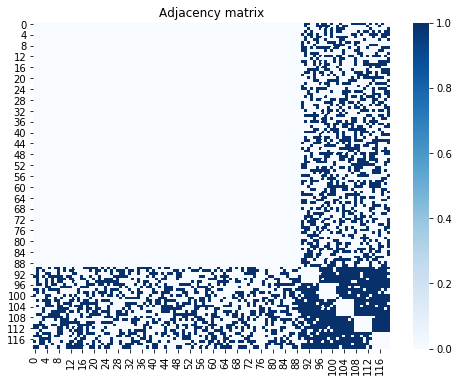

In [19]:
fgaba = np.load("fgaba_mat.npy")
ach = np.load("ach_mat.npy")
n_fgaba_syn = int(np.sum(fgaba))
n_fgaba_syn_pn = int(np.sum(fgaba[:90,:]))
n_fgaba_syn_pl = int(np.sum(fgaba[90:,:]))
n_ach_syn = int(np.sum(ach))
n_syn = n_fgaba_syn + n_ach_syn
G = ach+fgaba
scale = 1
%matplotlib inline
plt.figure(figsize = (8,6))
sns.heatmap(G, cmap = "Blues")
plt.title("Adjacency matrix")
# plt.savefig("Adjacency_matrix.png")
Gx = nx.DiGraph(G[int(90*scale):,int(90*scale):])
Gxc = nx.complement(Gx)
gxc = nx.to_numpy_array(Gxc)
gx = nx.to_numpy_array(Gx)

[22  5 12 29  0  3  6  9 10 11 14 15 16 17 18 20 24  1  2  4  7  8 13 19
 21 23 25 26 27 28]
[array([22]), array([ 5, 12, 29]), array([ 0,  3,  6,  9, 10, 11, 14, 15, 16, 17, 18, 20, 24]), array([ 1,  2,  4,  7,  8, 13, 19, 21, 23, 25, 26, 27, 28])]
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Rearranged Graph')

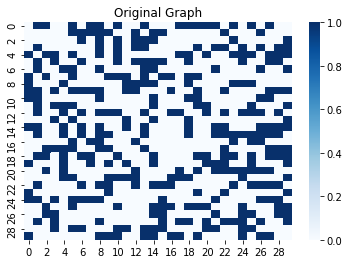

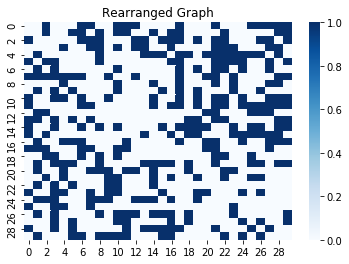

In [540]:
## Community detection

communities_list = Newmann_community(G,gamma=1,p_conn=0.6)
communities_list.sort(key=len)
communities = np.concatenate(communities_list)
print(communities)
print(communities_list)

## Plot rearranged graph

new = rearrange_adj(gx,communities)
%matplotlib

plt.figure()
sns.heatmap(G[int(90*scale):,int(90*scale):], cmap = "Blues")
plt.title("Original Graph")
#plt.savefig("Original Graph.png")

plt.figure()
sns.heatmap(new, cmap = "Blues")
plt.title("Rearranged Graph")
#plt.savefig("Rearranged Graph.png")

In [532]:
14000/16

875.0

In [31]:
data = []
for i in range(1,30):
    for j in range(1,3):
        data1 = np.load("batch"+str(i)+"_part_"+str(j)+".npy")
        data.append(data1)
        
#print(data)
data = np.concatenate(data)
data.shape

(14267, 2979)

In [32]:
scale = 1
V = data[:,:int(120*scale)]
V_ln = V[:,int(90*scale):]
V_pn = V[:,:int(90*scale)]
p = data[:,int(120*scale):int(120*scale)+n_syn]
Ca = data[:,int(120*scale)+n_syn:]
time = np.arange(len(V))

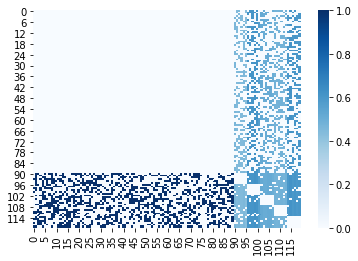

In [33]:
A_fac = weighted_adjmatrix(G,p,ach,fgaba)
%matplotlib inline
sns.heatmap(A_fac, cmap = "Blues")
# plt.savefig("Evolved_Adjacency_matrix.png")

In [8]:
# which neurons are spiking? PN

num_spikingneurons = np.zeros(int(120*scale))
for i in range(0,int(120*scale)):
    a,_ = sp.find_peaks(V[:,i], height = 35)
    if len(a):
        num_spikingneurons[i] = 1
print(np.nonzero(num_spikingneurons))
print(np.count_nonzero(num_spikingneurons))

spiking_neurons = np.array(np.nonzero(num_spikingneurons))
print(spiking_neurons.shape)

# which neurons are spiking? LN

num_spikingneurons_LN = np.zeros(int(120*scale))
for i in range(int(90*scale),int(120*scale)):
    a,_ = sp.find_peaks(V[:,i], height = -20)
    if len(a):
        num_spikingneurons_LN[i] = 1
print(np.nonzero(num_spikingneurons_LN))
print(np.count_nonzero(num_spikingneurons_LN))

spiking_neurons_LN = np.array(np.nonzero(num_spikingneurons_LN))
print(spiking_neurons_LN.shape)

(array([ 1,  4,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 30]),)
24
(1, 24)
(array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119]),)
30
(1, 30)


In [552]:
%matplotlib
f1 = plt.figure(1,figsize = (20,10))
sns.heatmap(np.transpose(V_pn), cmap = "Greys")
plt.title("PN Raster Plot")
plt.savefig("PN Raster Plot.png")

Using matplotlib backend: Qt5Agg


Using matplotlib backend: Qt5Agg


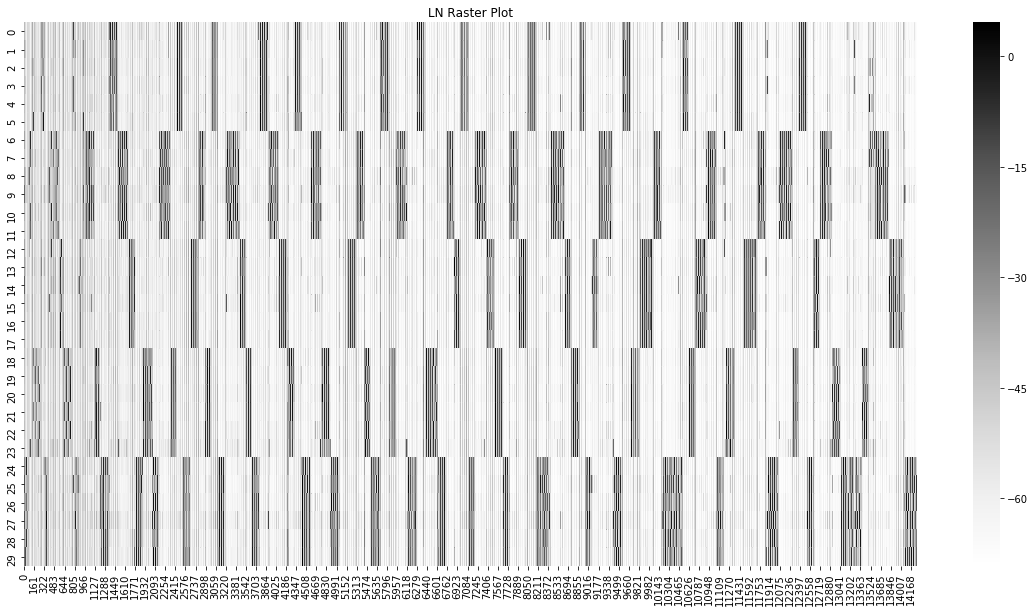

In [34]:
%matplotlib
f2 = plt.figure(2,figsize = (20,10))
sns.heatmap(np.transpose(V_ln), cmap = "Greys")
plt.title("LN Raster Plot")
plt.show()
# plt.savefig("LN Raster Plot.png")

In [ ]:
plt.plot(time, Ca[:,(21,1)])

In [ ]:
n_blocks = 5
size_block = 6

# Z = G[90:,90:]
Z = A_fac[90:,90:]
t = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new = t.dot(Z).dot(t.T)

Z_o = G[90:,90:]
t = np.eye(n_blocks).repeat(size_block, axis=1)
Z_newo = t.dot(Z_o).dot(t.T)


plt.figure(1,figsize = (10,10))
sns.heatmap(Z_new, cmap = "Blues", annot = True, fmt="f")

plt.figure(2,figsize = (10,10))
sns.heatmap(Z_newo, cmap = "Blues", annot = True)



In [ ]:
np.sum(Z_newo, axis = 0)

In [ ]:
fgf = np.sum(ach[90:,:90], axis = 1)
print(fgf.reshape(5,6))

print(np.sum(fgf.reshape(5,6), axis = 1))

Text(0.5, 1.0, 'p vs time')

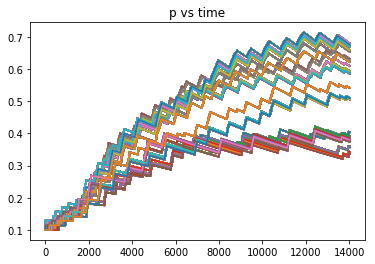

In [24]:
%matplotlib inline
plt.plot(time,p[:,n_ach_syn:])
plt.title("p vs time")
# plt.savefig("P vs Time")

In [ ]:
# PN groups according to LN groups

#LN_grp1 = communties_list[0]+90 #etc
LN_grp1 = np.arange(90,96)
LN_grp2 = np.arange(96,102)
LN_grp3 = np.arange(102,108)
LN_grp4 = np.arange(108,114)
LN_grp5 = np.arange(114,120)


#PN_grp1_out = G[:,LN_grp1]

In [ ]:
def PN_identities(G, LN_grp, in_out):
    # in = input to LN group from PN
    # out = output from LN group to PN
    PN_grp = []
    temp = []
    for i in LN_grp:
        if in_out == "in":
            temp.append(np.nonzero(G[i,:90]))
        if in_out == "out":
            temp.append(np.nonzero(G[:90,i]))
       # PN_grp.append(np.array(temp[i]))
    return temp

def sum_weights(G, LN_grp, in_out):
    weights = []
    temp = []
    #in_out = "in"
    for i in LN_grp:
        if in_out == "in":
            temp.append(np.sum(G[i,:90]))
        if in_out == "out":
            temp.append(np.sum(G[:90,i]))

    return temp




In [ ]:
print(np.count_nonzero(A_fac[91,:90]))

In [ ]:
np.nonzero(G[LN_grp1,:90])

In [ ]:
#PN_grp12 = PN_identities(G, LN_grp1, "out") 
PN_grp12 = PN_identities(G, LN_grp5, "in")
#print(aa[0][0])
#print(np.array(set(aa[1][0]) & set(bb[1][0])))

In [ ]:
W_in_1 = sum_weights(A_fac, LN_grp1, "in")
W_in_2 = sum_weights(A_fac, LN_grp2, "in")
W_in_3 = sum_weights(A_fac, LN_grp3, "in")
W_in_4 = sum_weights(A_fac, LN_grp4, "in")
W_in_5 = sum_weights(A_fac, LN_grp5, "in")

In [ ]:
print(sum(W_in_1))
print(sum(W_in_2))
print(sum(W_in_3))
print(sum(W_in_4))
print(sum(W_in_5))

In [ ]:
W_out_1 = sum_weights(A_fac, LN_grp1, "out")
W_out_2 = sum_weights(A_fac, LN_grp2, "out")
W_out_3 = sum_weights(A_fac, LN_grp3, "out")
W_out_4 = sum_weights(A_fac, LN_grp4, "out")
W_out_5 = sum_weights(A_fac, LN_grp5, "out")

In [ ]:
print(sum(W_out_1))
print(sum(W_out_2))
print(sum(W_out_3))
print(sum(W_out_4))
print(sum(W_out_5))

In [ ]:
ff = list(set(PN_grp12[0][0]) & set(PN_grp12[1][0]) & set(PN_grp12[2][0]) & set(PN_grp12[3][0]) & set(PN_grp12[4][0]) & set(PN_grp12[5][0]))

In [27]:
%cd 2019-08-10_run2/

/home/shruti/Documents/nerveFlow/interactive/Autobatch/2019-08-10_run2


Using matplotlib backend: Qt5Agg


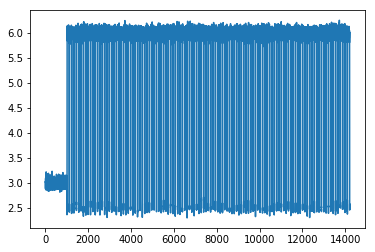

In [30]:
%matplotlib
curr = np.load("current.npy")
plt.plot(curr[25,::100])

In [ ]:
%matplotlib
start_comm = 0
plt.figure()
for i in range(start_comm,start_comm+len(communities_list[start_comm:])):
    plt.subplot(len(communities_list[start_comm:]),1,i+1-start_comm)
    sns.heatmap(np.transpose(V_ln[:,communities_list[i]]), cmap = "Greys")  

In [ ]:
N = 100
start_comm = 0 
plt.figure()
for i in range(start_comm,start_comm+len(communities_list[start_comm:])):
    plt.subplot(len(communities_list[start_comm:]),1,i+1-start_comm)
    plt.plot(np.convolve(np.average(V_ln[:,communities_list[i]],1),np.ones((N,))/N)[200:-200])

In [551]:
V_avg = np.average(V[:,:int(90*scale)], axis = 1)

%matplotlib
plt.plot(time,V_avg)
plt.title("Local Field Potential")
# plt.savefig("LFP")

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Local Field Potential')

In [ ]:
V_avg.shape

In [ ]:
%matplotlib
plt.figure()
plt.plot(time,V[:,(100)])
#plt.title("LN 10 and 21 switching")
#plt.savefig("Switching LN.png")

In [ ]:
plt.plot(p[-1,:])

In [ ]:
V_avg = V_avg - np.average(V_avg)
V_avg = sp.detrend(V_avg)
plt.plot(time,V_avg)

In [ ]:
#PSD Welch method

V_avg = V_avg - np.average(V_avg)
V_avg = sp.detrend(V_avg)
#plt.plot(time,V_avg)
start_pulse = 10
pulse_width = 100
time_step = 1
trial_number = 30

power = np.zeros(trial_number)
dd = np.zeros(trial_number)
for i in range(0,trial_number):
    Fs = 1000.0/time_step
    Ts = 1.0/Fs
    C_avg_i = V_avg[i*int((pulse_width+start_pulse)/time_step) + int(start_pulse/time_step) : int(start_pulse/time_step) + (i+1)*int((pulse_width)/time_step) + i*int(start_pulse/time_step)]
    freq, PSD = sp.welch(C_avg_i, Fs, nperseg = 500)
    fr_plot = np.nonzero(freq < 150)
    #plt.figure()
    #plt.plot(freq[fr_plot], PSD[fr_plot])
    #plt.ylabel('PSD (V^2/Hz)')
    #plt.xlabel('Frequency')
    #plt.title("PSD trial no - {}".format(i))
    range_freq = np.nonzero((freq>5) & (freq<50))
    power[i] = np.trapz(PSD[range_freq])


In [ ]:
freq, PSD = sp.welch(V_avg, Fs)
fr_plot = np.nonzero(freq < 100)
plt.plot(freq[fr_plot], PSD[fr_plot])

In [ ]:
freq.shape

In [ ]:
plt.close("all")
print(power)
plt.scatter(np.arange(30),power)
plt.title("Integrated LFP Power vs trials")
#plt.savefig("Integrated_power.png")

In [ ]:
plt.close("all")

In [ ]:
### raster Data 
trial_number = 100
rasterData_PN = np.zeros((len(time),90))
pulse_width = 100
start_pulse = 50
time_step = 1
spcount = np.zeros((90,trial_number))
for i in range(0,90):
    a,_ = sp.find_peaks(V[:,i], height = 35)
    rasterData_PN[a,i] = 1
    for trial in range(0,trial_number):
        spcount[i,trial] = sum(rasterData_PN[trial*int((pulse_width+start_pulse)/time_step) + int(start_pulse/time_step) : int(start_pulse/time_step) + (trial+1)*int((pulse_width)/time_step) + trial*int(start_pulse/time_step),i],0)
print(rasterData_PN.shape)

rasterData_LN = np.zeros((len(time),30))

for i in range(0,30):
    a,_ = sp.find_peaks(V[:,i+90], height = -20)
    rasterData_LN[a,i] = 1
    
print(rasterData_LN.shape)
rasterData = np.hstack((rasterData_PN,rasterData_LN))

In [ ]:
n_n = 120
win_length = 50
FR = np.zeros((int(len(time)/win_length),n_n))
for n in range(n_n):
    for i in range(int(len(time)/win_length)):
        FR[i,n] = np.count_nonzero(rasterData[i*win_length:(i+1)*win_length,n])


In [ ]:
sns.heatmap(rasterData_LN.transpose(), cmap = "Blues")

In [ ]:
%matplotlib
start_comm = 0
plt.figure()
for i in range(start_comm,start_comm+len(communities_list[start_comm:])):
    plt.subplot(len(communities_list[start_comm:]),1,i+1-start_comm)
    sns.heatmap(np.transpose(FR[:,90+communities_list[i]]/len(communities_list[i])), cmap = "Greys")
 
plt.figure()
for i in range(start_comm,start_comm+len(communities_list[start_comm:])):
    plt.subplot(len(communities_list[start_comm:]),1,i+1-start_comm)
    plt.plot(np.average(FR[:,90+communities_list[i]],1))

In [ ]:
plt.figure()
N = 10
for i in range(start_comm,start_comm+len(communities_list[start_comm:])):
    plt.subplot(len(communities_list[start_comm:]),1,i+1-start_comm)
    plt.plot(np.convolve(np.average(FR[:,90+communities_list[i]],1),np.ones((N,))/N))

In [ ]:
N = 45
mov_av1 = np.convolve(V_ln[:,21], np.ones((N,))/N)
mov_av2 = np.convolve(V_ln[:,22], np.ones((N,))/N)


In [ ]:
plt.figure()
plt.plot(time,V_ln[:,(21,22)])


In [ ]:
plt.plot(mov_av1[200:-200])
plt.plot(mov_av2[20:-200])

In [ ]:
# Nice raster plot 
plt.spy(np.transpose(rasterData_PN), aspect='auto', markersize = 10, marker = ".")
plt.show()
plt.grid(True)
#manager = pl.get_current_fig_manager()
#manager.resize(*manager.window.maxsize())

plt.title("Raster plot_PN")
#pl.savefig("Figures/Raster plot_PN.png")

In [ ]:
plt.spy(np.transpose(rasterData_LN), aspect='auto', markersize = 10, marker = ".")
plt.show()
plt.grid(True)
#manager = pl.get_current_fig_manager()
#manager.resize(*manager.window.maxsize())

plt.title("Raster plot_LN")
#pl.savefig("Figures/Raster plot_LN.png")

In [35]:
# create new directory for every new run and save nsets and ssets in that
 
date = datetime.date.today()
#print date

run_number = 1

dirt = "{}_run{}".format(date,run_number)
print(dirt)

os.makedirs("{}".format(dirt))
#os.makedirs("{}/Figures".format(dirt))


np.save("{}/data".format(dirt), data)
#shutil.move("state_vector.npy", "{}/state_vector.npy".format(dirt))
shutil.move("state_vector.npy", "{}/state_vector.npy".format(dirt))
shutil.copy("run2params.py", "{}/run2params.py".format(dirt))
shutil.copy("gen_input_DC.py", "{}/gen_input_DC.py".format(dirt))
shutil.move("parameters_used.json", "{}/parameters_used.json".format(dirt))
shutil.move("fgaba_mat.npy", "{}/fgaba_mat.npy".format(dirt))
shutil.move("ach_mat.npy", "{}/ach_mat.npy".format(dirt))
shutil.move("current.npy", "{}/current.npy".format(dirt))

2019-08-11_run1


'2019-08-11_run1/current.npy'

In [ ]:
## Compare between trials 
%cd ..

In [36]:
data_1 = np.load("2019-08-10_run2/data.npy")
V1 = data_1[:,:int(120*scale)]
V_ln1 = V1[:,int(90*scale):]
V_pn1 = V1[:,:int(90*scale)]
p1 = data_1[:,int(120*scale):]
time1 = np.arange(len(V1))


data_2 = np.load("2019-08-11_run1/data.npy")
V2 = data_2[:,:int(120*scale)]
V_ln2 = V2[:,int(90*scale):]
V_pn2 = V2[:,:int(90*scale)]
p2 = data_2[:,int(120*scale):]
time2 = np.arange(len(V2))

data_3 = np.load("2019-08-05_run1/data.npy")
V3 = data_3[:,:int(120*scale)]
V_ln3 = V3[:,int(90*scale):]
V_pn3 = V3[:,:int(90*scale)]
p3 = data_3[:,int(120*scale):]
time3 = np.arange(len(V3))

Using matplotlib backend: Qt5Agg


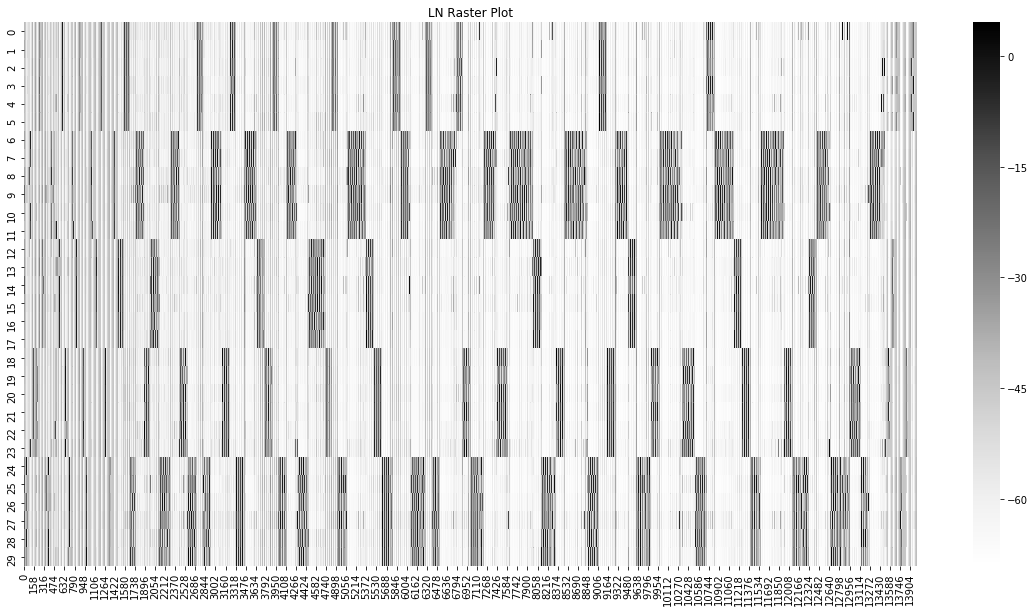

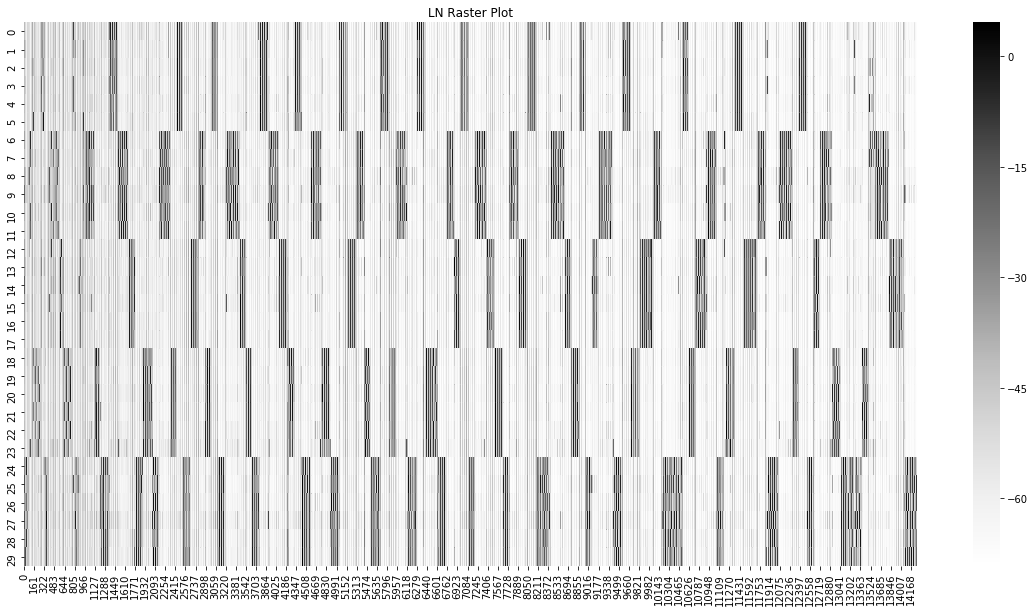

In [38]:
%matplotlib
f1 = plt.figure(1,figsize = (20,10))
sns.heatmap(np.transpose(V_ln1), cmap = "Greys")
plt.title("LN Raster Plot")
plt.show()

f2 = plt.figure(2,figsize = (20,10))
sns.heatmap(np.transpose(V_ln2), cmap = "Greys")
plt.title("LN Raster Plot")
plt.show()
# plt.savefig("LN Raster Plot.png")

In [37]:
fgaba1 = np.load("2019-08-10_run2/fgaba_mat.npy")
ach1 = np.load("2019-08-10_run2/ach_mat.npy")
n_fgaba_syn1 = int(np.sum(fgaba1))
n_fgaba_syn_pn1 = int(np.sum(fgaba1[:90,:]))
n_fgaba_syn_pl1 = int(np.sum(fgaba1[90:,:]))
n_ach_syn1 = int(np.sum(ach1))
n_syn1 = n_fgaba_syn1 + n_ach_syn1
G1 = ach1+fgaba1

fgaba2 = np.load("2019-08-11_run1/fgaba_mat.npy")
ach2 = np.load("2019-08-11_run1/ach_mat.npy")
n_fgaba_syn2 = int(np.sum(fgaba2))
n_fgaba_syn_pn2 = int(np.sum(fgaba2[:90,:]))
n_fgaba_syn_pl2 = int(np.sum(fgaba2[90:,:]))
n_ach_syn2 = int(np.sum(ach2))
n_syn2 = n_fgaba_syn2 + n_ach_syn2
G2 = ach2+fgaba2

fgaba3 = np.load("2019-08-05_run1/fgaba_mat.npy")
ach3 = np.load("2019-08-05_run1/ach_mat.npy")
# n_fgaba_syn1 = int(np.sum(fgaba1))
# n_fgaba_syn_pn1 = int(np.sum(fgaba1[:90,:]))
# n_fgaba_syn_pl1 = int(np.sum(fgaba1[90:,:]))
# n_ach_syn1 = int(np.sum(ach1))
# n_syn1 = n_fgaba_syn1 + n_ach_syn1
G3 = ach3+fgaba3

A_fac1 = weighted_adjmatrix(G1,p1,ach1,fgaba1)
A_fac2 = weighted_adjmatrix(G2,p2,ach2,fgaba2)
A_fac3 = weighted_adjmatrix(G3,p3,ach3,fgaba3)

A_fac1_ln = A_fac1[90:,90:]
A_fac2_ln = A_fac2[90:,90:]
A_fac3_ln = A_fac3[90:,90:]

ValueError: shape mismatch: value array of shape (1762,) could not be broadcast to indexing result of shape (1732,)

In [ ]:
fgf = np.sum(ach1[90:,:90], axis = 1)
print(fgf.reshape(5,6))

print(np.sum(fgf.reshape(5,6), axis = 1))

In [ ]:
n_blocks = 5
size_block = 6

Z1 = A_fac[90:,90:]
t = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new = t.dot(Z).dot(t.T)

In [ ]:
n_blocks = 5
size_block = 6

Z1 = A_fac[90:,90:]
t = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new = t.dot(Z).dot(t.T)

plt.figure(1,figsize = (10,10))
sns.heatmap(Z_new1, cmap = "Blues", annot = True, fmt="f")


In [ ]:
n_blocks = 5
size_block = 6

Z1 = A_fac1_ln
t = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new1 = t.dot(Z1).dot(t1.T)

Z2 = A_fac2_ln
# t2 = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new2 = t.dot(Z2).dot(t2.T)

Z3 = A_fac3_ln
# t3 = np.eye(n_blocks).repeat(size_block, axis=1)
Z_new3 = t.dot(Z3).dot(t3.T)

In [ ]:
%matplotlib

plt.figure(1,figsize = (10,10))
sns.heatmap(Z_new1, cmap = "Blues", annot = True, fmt="f")

plt.figure(2,figsize = (10,10))
sns.heatmap(Z_new2, cmap = "Blues", annot = True, fmt="f")

plt.figure(3,figsize = (10,10))
sns.heatmap(Z_new3, cmap = "Blues", annot = True, fmt="f")

In [ ]:
f2 = plt.figure(2,figsize = (20,10))
sns.heatmap(np.transpose(V_ln3), cmap = "Greys")
plt.title("LN Raster Plot")
plt.show()

In [543]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X = pca.fit_transform(V_ln)

In [544]:
plt.plot(X[:,0],X[:,1],'.-',c)

NameError: name 'c' is not defined

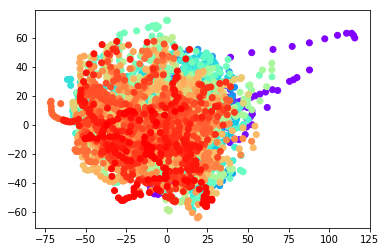

In [545]:
plt.scatter(X[:,0],X[:,1],c=time,cmap='rainbow')

In [510]:
time

array([   0,    1,    2, ..., 5900, 5901, 5902])

In [549]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[::10,0],X[::10,1],time[::10],c=time[::10])
ax.plot(X[:,0],X[:,1],time)

Using matplotlib backend: Qt5Agg
